# Introduction

   This is an attempt to predict Stock prices based on Stock prices of previous days. [The stock market](https://www.investopedia.com/terms/s/stockmarket.asp) refers to the collection of markets and exchanges where regular activities of buying, selling, and issuance of shares of publicly-held companies take place. 
   
  This is a time series analysis and we will see simple eight ways to predict the Stock prices. The various models to be used are:
   1. Average
   2. Weighted Average
   3. Moving Average
   4. Moving Weighted Average
   5. Linear Regression
   6. Weighted Linear Regression
   7. Lasso Regression
   8. Moving Window Neural Network 

In [410]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse
# Any results you write to the current directory are saved as output.

# The Data
   
   
   The data we use for prediction would be for closing price of [Infosys](https://www.infosys.com/) in NSE for the business days in 2015. So we will import only the Date column and Closing price column. 

In [411]:
# !head -3 /kaggle/input/national-stock-exchange-time-series/infy_stock.csv

In [412]:
cd=pd.read_csv("infy_stock.csv")
cd.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [413]:
df = pd.read_csv("infy_stock.csv",usecols=['Date', 'Close'])
df.head()

,Date,Close
0,2015-01-01,1974.40
1,2015-01-02,2013.20
2,2015-01-05,1995.90
3,2015-01-06,1954.20
4,2015-01-07,1963.55


In [434]:
X = df.drop(['Close'], axis=1)
Y = df['Close']

In [421]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [422]:
print(x_train.shape,x_test.shape)

(198, 1) (50, 1)


In [423]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

In [424]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(depth=7, iterations=300, l2_leaf_reg= 1, learning_rate= 0.1,verbose=0) #
lgb = lgb.LGBMClassifier(colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265) 

#

In [425]:
clfs = {
    'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [426]:
from sklearn.metrics import precision_score,accuracy_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [429]:
X_new = X.drop(columns=[col for col in X.columns if pd.isna(col)], axis=1)
X_new_test = X_test.drop(columns=[col for col in X_test.columns if pd.isna(col)], axis=1)

In [433]:
X_new

,Date
0,2015-01-01
1,2015-01-02
2,2015-01-05
3,2015-01-06
4,2015-01-07
...,...
243,2015-12-24
244,2015-12-28
245,2015-12-29
246,2015-12-30


In [432]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.feature_selection import RFE

clf = RandomForestRegressor()

clf.fit(X_new,y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)
feature_scores

ValueError: could not convert string to float: '2015-01-01'

In [403]:
# df['date'] = Date
# df.drop('Date',axis=1,inplace=True)
# df = df.set_index('date')
# df.head()

In [419]:
df.tail()

,Date,Close
243,2015-12-24,1096.35
244,2015-12-28,1104.75
245,2015-12-29,1104.70
246,2015-12-30,1086.30
247,2015-12-31,1105.40


We have data on working days only and so there are 248 data with start date as 01-01-2015 and end date as 31-12-2015.

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    248 non-null    object 
 1   Close   248 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [406]:
print("Min:",df.index.min())
print("Max:",df.index.max())

Min: 0
Max: 247


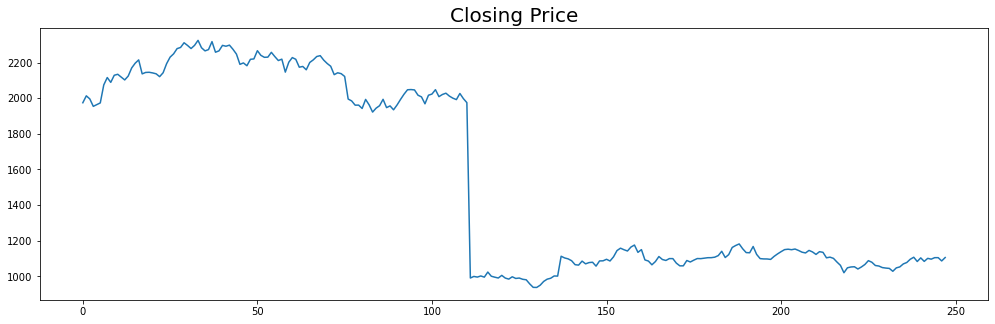

In [407]:
plt.figure(figsize=(17,5))
df.Close.plot()
plt.title("Closing Price",fontsize=20)
plt.show()

# Adjustment for split-up

There is a huge drop on 15/06/2015, this was the [fifth split](https://www.splithistory.com/infy/) in Infosys Share price. If we take this whole data, the prediction might not be  as expected as there is a split in between!

We have to either drop the data or adjust the values before split. Since the split is 2 for 1, we can normalize the data prior to split by dividing them by 2. (Old shares are half that of today's share).

In [414]:
# plt.figure(figsize=(17,5))
# stock_price = pd.concat([df.Close[:'2015-06-12']/2,df.Close['2015-06-15':]]) # adjustment
# plt.plot(stock_price)
# plt.title("Closing Price Adjusted",fontsize=20)
# plt.show()

And now we have an adjusted time series of Infosys stock prices.

Lets now Predict the Stock price based on various methods. 
 
* We will predict the values on last 68 days in the series.
* We will use Mean squared error as a metrics to calculate the error in our prediction.
* We will compare the results of various methods at the end.

In [385]:
#helper function to plot the stock prediction
prev_values = stock_price.iloc[:180]
y_test = stock_price.iloc[180:]

def plot_pred(pred,title):
    plt.figure(figsize=(17,5))
    plt.plot(prev_values,label='Train')
    plt.plot(y_test,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

# 2. Weighted Mean

We shall give more weightage to the data which are close to the last day in training data, while calculating the mean. The last day in the training set will get a weightage of 1(=180/180) and the first day will get a weightage of 1/180.

In [297]:
# weight = np.array(range(0,180))/180
# weighted_train_data =np.multiply(prev_values,weight)

# # weighted average is the sum of this weighted train data by the sum of the weight

# weighted_average = sum(weighted_train_data)/sum(weight)
# y_wa = pd.Series(np.repeat(weighted_average,68),index=y_test.index)

# mse(y_wa,y_test)

In [298]:
# plot_pred(y_wa,"Weighted Average")

In [415]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

    For the other methods we will predict the value of stock price on a day based on the values of stock prices of 80 days prior to it. So in our series we will not consider the first eight days (since there previous eighty days is not in the series).
    We have to test the last 68 values. This would be based on the last 80 days stock prices of each day in the test data.
    Since we have neglected first 80 and last 68 is our test set, the train dataset will be between 80 and 180 (100 days).

In [416]:
y_train = stock_price[80:180]
y_test = stock_price[180:]
print("y train:",y_train.shape,"\ny test:",y_test.shape)

y train: (100,) 
y test: (68,)


 There are 100 days in training and 68 days in testing set. We will construct the features, that is the last 80 days stock for each date in the y_train and y_test. This would be our target variable.

In [417]:
y_test

Date
2015-09-21    1104.65
2015-09-22    1107.45
2015-09-23    1116.25
2015-09-24    1140.55
2015-09-28    1105.55
               ...   
2015-12-24    1096.35
2015-12-28    1104.75
2015-12-29    1104.70
2015-12-30    1086.30
2015-12-31    1105.40
Name: Close, Length: 68, dtype: float64

In [418]:
X_train = pd.DataFrame([list(stock_price[i:i+1]) for i in range(100)],
                       columns=range(1,0,-1),index=y_train.index)
X_test = pd.DataFrame([list(stock_price[i:i+1]) for i in range(100,168)],
                       columns=range(1,0,-1),index=y_test.index)

X_train

,1
Date,
2015-04-30,987.200
2015-05-04,1006.600
2015-05-05,997.950
2015-05-06,977.100
2015-05-07,981.775
...,...
2015-09-11,1023.225
2015-09-14,1008.400
2015-09-15,1003.650


      X_train is now a collection of 100 dates as index and a collection of stock prices of previous 80 days as features.
    
      Similarlily, X_test is now a collection of 68 dates as index and a collection of stock prices of previous 80 days as features.
      
      NOTE: Here 76 working days from '2015-05-04', the stock had a price of 986.725 and 77 working days from '2015-05-05', the stock has the same value. You can see the similarity of values along the diagonal. This is because consecutitive data will be similar to the previous except it drops the last value, shifts and has a new value.
      
      We will use these values for stock price prediction in the other four methods.

# 3. Moving Average
   We have to predict the 68 values in data set and for each values we will get the average of previous 80 days.  
   This will be a simple mean of each column in the y_test.

In [242]:
# y_ma = X_test.mean(axis=1)
# mse(y_ma,y_test)

In [243]:
# plot_pred(y_ma,"Moving Average")

# 4. Weighted Moving Average

We will obtain the stock price on the test date by calculating the weighted mean of past 80 days. The last of the 80 day will have a weightage of 1(=80/80) and the first will have a weightage of 1/80. 

In [244]:
# weight = np.array(range(1,81))/80
# #weighted moving average
# y_wma = X_test@weight/sum(weight)
# mse(y_wma,y_test)

In [245]:
# plot_pred(y_wma,"Weighted Moving Average")

# 4. Linear regression
   In this method, we will perform a linear regression on our dataset. The values will be predicted as a linear combination of the previous 80 days values. 

In [342]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
y_lr = pd.Series(y_lr,index=y_test.index)

mse(y_test,y_lr)

3428.438896439114

In [343]:
# plot_pred(y_lr,"Linear Regression")

# 6. Weighted Linear Regression
We will provide weightage to our input data rather than the features. 

In [349]:
X_test.head()

,1
Date,
2015-09-21,1011.575
2015-09-22,1023.900
2015-09-23,1004.325
2015-09-24,1010.450
2015-09-28,1014.025


In [248]:
# weight = np.array(range(1,101))/100
# wlr = LinearRegression()

# wlr.fit(X_train,y_train,weight)
# y_wlr = wlr.predict(X_test)
# y_wlr = pd.Series(y_wlr,index=y_test.index)

# mse(y_test,y_wlr)

In [249]:
# plot_pred(y_wlr,"Weighted Linear Regression")

# 7. Lasso Regression

Linear Regression with L1 regulations.

In [253]:
# train    =   df[df.index.month <= 11] 
# test     =   df[df.index.month >=12 ]

In [254]:
# df['month'] = date
# df.drop('Date',axis=1,inplace=True)
# df = df.set_index('month')

In [255]:
# print(train.shape)
# print(test.shape)

In [256]:
# train.describe()

In [257]:
# train_time = [i+1 for i in range(len(train))]
# test_time = [i+len(train)+1 for i in range(len(test))]
# len(train_time), len(test_time)

In [258]:
# from sklearn.linear_model import LinearRegression
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [259]:
# SES_train = train.copy()
# SES_test = test.copy()

In [260]:
# train.describe()

In [261]:
# model_SES = SimpleExpSmoothing(SES_train['Close'])
# model_SES_autofit = model_SES.fit(optimized=True)

In [262]:
# model_SES_autofit.params

In [263]:
# SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
# SES_test.head()

In [350]:
from sklearn.linear_model import Lasso
lasso = Lasso()

las = lasso.fit(X_train,y_train)
y_las = las.predict(X_test)
y_las = pd.Series(y_las,index = y_test.index)

mse(y_las,y_test)

3429.158765134825

In [351]:
X_test

,1
Date,
2015-09-21,1011.575
2015-09-22,1023.900
2015-09-23,1004.325
2015-09-24,1010.450
2015-09-28,1014.025
...,...
2015-12-24,1064.600
2015-12-28,1082.800
2015-12-29,1111.050


In [352]:
X_test.to_csv('GeeksforGeeks.csv', index = None)

In [330]:
y_las.head()

Date
2015-09-21    1065.216221
2015-09-22    1059.448645
2015-09-23    1068.608912
2015-09-24    1065.742673
2015-09-28    1064.069725
dtype: float64

In [373]:
string.reshape(-1, 1)

AttributeError: 'str' object has no attribute 'reshape'

In [371]:
y_las = las.predict([[string]].reshape(-1, 1))

AttributeError: 'list' object has no attribute 'reshape'

In [331]:
import time
import datetime

In [365]:
with open('test_stock_txt.txt') as f:
    content = f. readlines()

In [366]:
def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += ele
 
    # return string
    return str1
(listToString(content))

'2015-09-21'

In [367]:
string=listToString(content)

AttributeError: 'str' object has no attribute 'dtype'

In [337]:
element

datetime.datetime(2015, 9, 21, 0, 0)

In [341]:
y_las = las.predict("21/09/2015")

ValueError: Expected 2D array, got scalar array instead:
array=21/09/2015.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [278]:
kd = pd.read_csv("test_stock.csv")

In [279]:
date = pd.date_range(start='11/08/2023', end='12/08/2023', freq='M')
date

DatetimeIndex(['2023-11-30'], dtype='datetime64[ns]', freq='M')

In [280]:
kd['date'] = date
kd.drop('Date',axis=1,inplace=True)
kd = kd.set_index('date')
kd.head()

""
date
2023-11-30


In [281]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2015-09-21 to 2015-12-31
Data columns (total 80 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   80      68 non-null     float64
 1   79      68 non-null     float64
 2   78      68 non-null     float64
 3   77      68 non-null     float64
 4   76      68 non-null     float64
 5   75      68 non-null     float64
 6   74      68 non-null     float64
 7   73      68 non-null     float64
 8   72      68 non-null     float64
 9   71      68 non-null     float64
 10  70      68 non-null     float64
 11  69      68 non-null     float64
 12  68      68 non-null     float64
 13  67      68 non-null     float64
 14  66      68 non-null     float64
 15  65      68 non-null     float64
 16  64      68 non-null     float64
 17  63      68 non-null     float64
 18  62      68 non-null     float64
 19  61      68 non-null     float64
 20  60      68 non-null     float64
 21  59      68 non-null  

In [282]:
# fd['Date'] = pd.to_numeric(fd['Date'])

In [285]:
y_las = las.predict('2019-09-30')

ValueError: Expected 2D array, got scalar array instead:
array=2019-09-30.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Date
2015-09-21    1127.998171
2015-09-22    1121.238322
2015-09-23    1086.567497
2015-09-24    1111.216517
2015-09-28    1126.096110
                 ...     
2015-12-24    1045.636502
2015-12-28    1068.161873
2015-12-29    1126.978350
2015-12-30    1071.658209
2015-12-31    1049.746300
Length: 68, dtype: float64

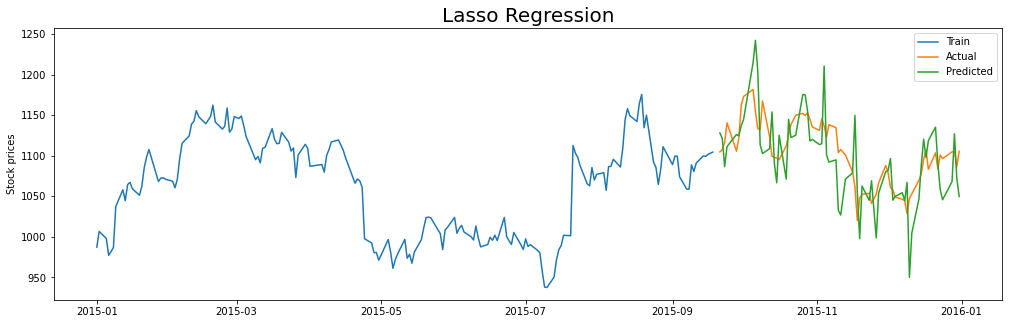

In [27]:
plot_pred(y_las,"Lasso Regression")

# 8. Moving window Neural Network

We construct a simple Feed Forward network taking 80 features as our input.

In [28]:
from keras.models import Sequential
from keras.layers import Dense

#moving average Neural Network
ma_nn = Sequential([Dense(64,input_shape=(80,),activation='relu'), 
                    Dense(32,activation='linear'),Dense(1)])

ma_nn.compile(loss='mse',optimizer='rmsprop',metrics=['mae','mse'])

history = ma_nn.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.25)

Epoch 1/250
3/3 [==============================] - 2s 247ms/step - loss: 721331.1875 - mae: 818.4391 - mse: 721331.1875 - val_loss: 1982.7568 - val_mae: 34.7704 - val_mse: 1982.7568
Epoch 2/250
3/3 [==============================] - 0s 32ms/step - loss: 10340.2129 - mae: 83.2786 - mse: 10340.2129 - val_loss: 9806.8330 - val_mae: 89.9020 - val_mse: 9806.8330
Epoch 3/250
3/3 [==============================] - 0s 30ms/step - loss: 5858.6035 - mae: 62.4447 - mse: 5858.6035 - val_loss: 36334.9883 - val_mae: 186.2033 - val_mse: 36334.9883
Epoch 4/250
3/3 [==============================] - 0s 31ms/step - loss: 14109.5381 - mae: 102.9242 - mse: 14109.5381 - val_loss: 2199.0286 - val_mae: 40.2549 - val_mse: 2199.0286
Epoch 5/250
3/3 [==============================] - 0s 34ms/step - loss: 23199.7969 - mae: 135.1824 - mse: 23199.7969 - val_loss: 95976.7500 - val_mae: 307.2260 - val_mse: 95976.7500
Epoch 6/250
3/3 [==============================] - 0s 32ms/step - loss: 59916.5664 - mae: 230.5150 -

Epoch 46/250
3/3 [==============================] - 0s 34ms/step - loss: 45357.3516 - mae: 199.0118 - mse: 45357.3516 - val_loss: 5325.0005 - val_mae: 63.1291 - val_mse: 5325.0005
Epoch 47/250
3/3 [==============================] - 0s 36ms/step - loss: 34242.7109 - mae: 171.1742 - mse: 34242.7109 - val_loss: 43958.4219 - val_mae: 206.0253 - val_mse: 43958.4219
Epoch 48/250
3/3 [==============================] - 0s 34ms/step - loss: 16238.0479 - mae: 108.7768 - mse: 16238.0498 - val_loss: 2429.0618 - val_mae: 43.0373 - val_mse: 2429.0618
Epoch 49/250
3/3 [==============================] - 0s 31ms/step - loss: 26707.5508 - mae: 149.9141 - mse: 26707.5508 - val_loss: 44805.3789 - val_mae: 208.0793 - val_mse: 44805.3789
Epoch 50/250
3/3 [==============================] - 0s 33ms/step - loss: 16802.9727 - mae: 111.2347 - mse: 16802.9727 - val_loss: 3810.2981 - val_mae: 53.9643 - val_mse: 3810.2981
Epoch 51/250
3/3 [==============================] - 0s 38ms/step - loss: 40760.4648 - mae: 182

3/3 [==============================] - 0s 33ms/step - loss: 12714.7900 - mae: 102.2496 - mse: 12714.7900 - val_loss: 5594.1611 - val_mae: 62.3385 - val_mse: 5594.1611
Epoch 137/250
3/3 [==============================] - 0s 31ms/step - loss: 2745.2600 - mae: 41.9334 - mse: 2745.2600 - val_loss: 2606.3440 - val_mae: 37.8823 - val_mse: 2606.3440
Epoch 138/250
3/3 [==============================] - 0s 30ms/step - loss: 2339.4331 - mae: 39.3438 - mse: 2339.4331 - val_loss: 6432.4775 - val_mae: 69.8902 - val_mse: 6432.4775
Epoch 139/250
3/3 [==============================] - 0s 30ms/step - loss: 12671.2969 - mae: 101.5367 - mse: 12671.2969 - val_loss: 32884.2969 - val_mae: 176.3356 - val_mse: 32884.2969
Epoch 140/250
3/3 [==============================] - 0s 31ms/step - loss: 18444.8086 - mae: 127.9573 - mse: 18444.8086 - val_loss: 2964.7485 - val_mae: 49.3528 - val_mse: 2964.7485
Epoch 141/250
3/3 [==============================] - 0s 30ms/step - loss: 3126.9941 - mae: 45.7750 - mse: 3126.9

Epoch 182/250
3/3 [==============================] - 0s 34ms/step - loss: 2614.5803 - mae: 40.3806 - mse: 2614.5803 - val_loss: 5432.0273 - val_mae: 59.9736 - val_mse: 5432.0273
Epoch 183/250
3/3 [==============================] - 0s 30ms/step - loss: 6792.9849 - mae: 71.8721 - mse: 6792.9849 - val_loss: 20805.1367 - val_mae: 136.8629 - val_mse: 20805.1367
Epoch 184/250
3/3 [==============================] - 0s 32ms/step - loss: 15852.3535 - mae: 120.6218 - mse: 15852.3535 - val_loss: 34951.8711 - val_mae: 181.8849 - val_mse: 34951.8711
Epoch 185/250
3/3 [==============================] - 0s 33ms/step - loss: 9094.0137 - mae: 80.5613 - mse: 9094.0137 - val_loss: 4105.9424 - val_mae: 57.5262 - val_mse: 4105.9424
Epoch 186/250
3/3 [==============================] - 0s 34ms/step - loss: 2668.7808 - mae: 42.7552 - mse: 2668.7808 - val_loss: 2892.7959 - val_mae: 40.0241 - val_mse: 2892.7959
Epoch 187/250
3/3 [==============================] - 0s 26ms/step - loss: 4596.0771 - mae: 56.8163 - 

Epoch 228/250
3/3 [==============================] - 0s 33ms/step - loss: 5540.4214 - mae: 64.2418 - mse: 5540.4214 - val_loss: 16796.5703 - val_mae: 121.3112 - val_mse: 16796.5703
Epoch 229/250
3/3 [==============================] - 0s 33ms/step - loss: 10144.4629 - mae: 93.2044 - mse: 10144.4629 - val_loss: 3685.1929 - val_mae: 46.5827 - val_mse: 3685.1929
Epoch 230/250
3/3 [==============================] - 0s 28ms/step - loss: 1560.5236 - mae: 27.9418 - mse: 1560.5236 - val_loss: 3335.8447 - val_mae: 52.6787 - val_mse: 3335.8447
Epoch 231/250
3/3 [==============================] - 0s 30ms/step - loss: 952.8588 - mae: 22.4895 - mse: 952.8588 - val_loss: 2138.1226 - val_mae: 39.6483 - val_mse: 2138.1226
Epoch 232/250
3/3 [==============================] - 0s 29ms/step - loss: 2078.4692 - mae: 35.6339 - mse: 2078.4692 - val_loss: 31497.8828 - val_mae: 171.4265 - val_mse: 31497.8828
Epoch 233/250
3/3 [==============================] - 0s 28ms/step - loss: 18738.3359 - mae: 129.4211 - m

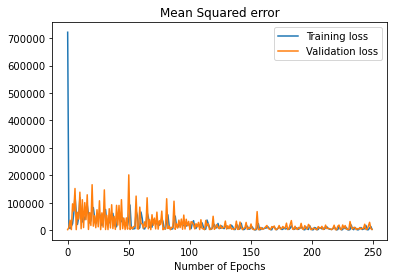

In [29]:
plt.plot(history.history['mse'],label='Training loss')
plt.plot(history.history['val_mse'], label='Validation loss')
plt.title("Mean Squared error")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

In [30]:
loss_nn,mae_nn,mse_nn = ma_nn.evaluate(X_test,y_test)
print("\nloss:",loss_nn,"\nmae:",mae_nn,"\nmse:",mse_nn)

3/3 [==============================] - 0s 5ms/step - loss: 2079.8760 - mae: 37.1739 - mse: 2079.8760

loss: 2079.8759765625 
mae: 37.17393112182617 
mse: 2079.8759765625


In [31]:
y_nn = ma_nn.predict(X_test)
y_nn = pd.Series(y_nn[:,0],index=y_test.index)
mse(y_nn,y_test)

2079.87559793688

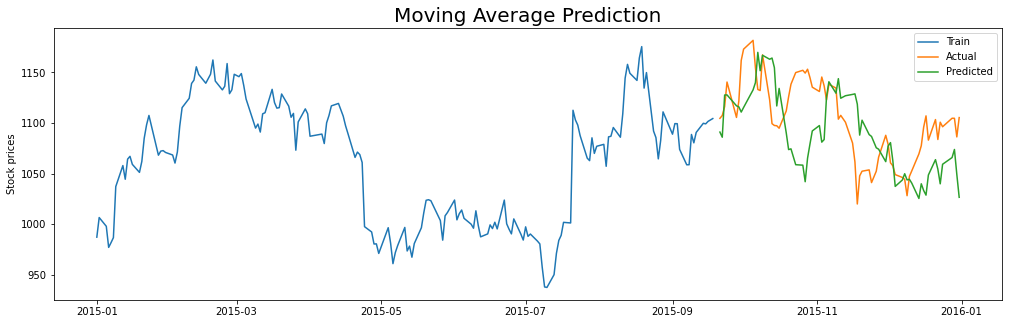

In [32]:
plot_pred(y_nn,"Moving Average Prediction")

The above methods are simple models. We will see more about classical time series analysis in the another notebook (Will update soon).

Feedbacks are most welcomed!